In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?')for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
train_labels[10]

3

In [8]:
import numpy as np

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
        return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1.
        return results

In [31]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [32]:
from keras.utils.np_utils import to_categorical

In [39]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [40]:
from keras import models

In [41]:
from keras import layers

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [43]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [44]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [45]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0729 19:58:57.597139  3640 deprecation.py:323] From C:\Users\junmin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 19:58:57.685902  3640 deprecation_wrapper.py:119] From C:\Users\junmin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 230us/step - loss: 3.8120 - acc: 0.0922 - val_loss: 3.7979 - val_acc: 0.2230
Epoch 2/20
7982/7982 [==============================] - 1s 145us/step - loss: 3.7882 - acc: 0.2211 - val_loss: 3.7770 - val_acc: 0.2230
Epoch 3/20
7982/7982 [==============================] - 1s 143us/step - loss: 3.7678 - acc: 0.2164 - val_loss: 3.7570 - val_acc: 0.2230
Epoch 4/20
7982/7982 [==============================] - 1s 138us/step - loss: 3.7478 - acc: 0.2224 - val_loss: 3.7373 - val_acc: 0.2230
Epoch 5/20
7982/7982 [==============================] - 1s 142us/step - loss: 3.7281 - acc: 0.3091 - val_loss: 3.7178 - val_acc: 0.2230
Epoch 6/20
7982/7982 [==============================] - 1s 136us/step - loss: 3.7085 - acc: 0.2458 - val_loss: 3.6983 - val_acc: 0.2230
Epoch 7/20
7982/7982 [==============================] - 1s 134us/step - loss: 3.6891 - acc: 0.2801 - val_loss: 3.6790 - val_acc: 0.2230


In [46]:
 import matplotlib.pyplot as plt

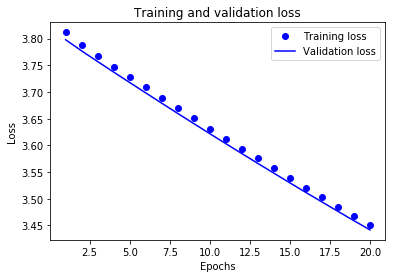

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [48]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [49]:
acc = history.history['acc']

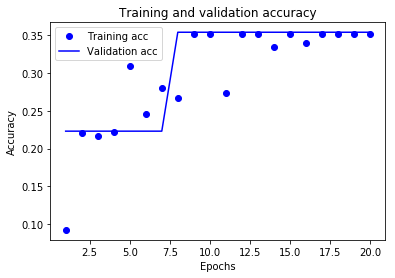

In [50]:
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [52]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results=model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 189us/step - loss: 3.8120 - acc: 0.1641 - val_loss: 3.7982 - val_acc: 0.3530
Epoch 2/9
7982/7982 [==============================] - 1s 145us/step - loss: 3.7882 - acc: 0.2969 - val_loss: 3.7772 - val_acc: 0.2220
Epoch 3/9
7982/7982 [==============================] - 1s 138us/step - loss: 3.7677 - acc: 0.3146 - val_loss: 3.7572 - val_acc: 0.2220
Epoch 4/9
7982/7982 [==============================] - 1s 135us/step - loss: 3.7478 - acc: 0.2746 - val_loss: 3.7374 - val_acc: 0.3530
Epoch 5/9
7982/7982 [==============================] - 1s 135us/step - loss: 3.7281 - acc: 0.3393 - val_loss: 3.7179 - val_acc: 0.3530
Epoch 6/9
7982/7982 [==============================] - 1s 133us/step - loss: 3.7085 - acc: 0.3294 - val_loss: 3.6984 - val_acc: 0.3530
Epoch 7/9
7982/7982 [==============================] - 1s 133us/step - loss: 3.6891 - acc: 0.3514 - val_loss: 3.6792 - val_acc: 0.3530
Epoch 8

In [53]:
results

[3.6433225992207854, 0.36197684778237277]

In [54]:
import copy

In [55]:
test_labels_copy = copy.copy(test_labels)

In [56]:
np.random.shuffle(test_labels_copy)

In [57]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [58]:
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [59]:
predictions = model.predict(x_test)

In [60]:
predictions[0].shape

(46,)

In [61]:
np.sum(predictions[0])

1.0

In [62]:
np.argmax(predictions[0])

3

In [63]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [64]:
model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

In [65]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

results=model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 271us/step - loss: 3.7812 - acc: 0.1550 - val_loss: 3.7413 - val_acc: 0.3530
Epoch 2/20
7982/7982 [==============================] - 2s 191us/step - loss: 3.7055 - acc: 0.3242 - val_loss: 3.6679 - val_acc: 0.3530
Epoch 3/20
7982/7982 [==============================] - 2s 188us/step - loss: 3.6325 - acc: 0.3482 - val_loss: 3.5961 - val_acc: 0.3540
Epoch 4/20
7982/7982 [==============================] - 1s 186us/step - loss: 3.5619 - acc: 0.3514 - val_loss: 3.5265 - val_acc: 0.3540
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 3.4935 - acc: 0.3514 - val_loss: 3.4591 - val_acc: 0.3540
Epoch 6/20
7982/7982 [==============================] - 2s 192us/step - loss: 3.4276 - acc: 0.3514 - val_loss: 3.3941 - val_acc: 0.3540
Epoch 7/20
7982/7982 [==============================] - 2s 193us/step - loss: 3.3633 - acc: 0.3514 - val_loss: 3.3309 - val_acc: 0.3540
